In [1]:
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

In [2]:
# Read in dataset
ais = pd.read_excel('../datasets/ais/ais.xlsx')
ais.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


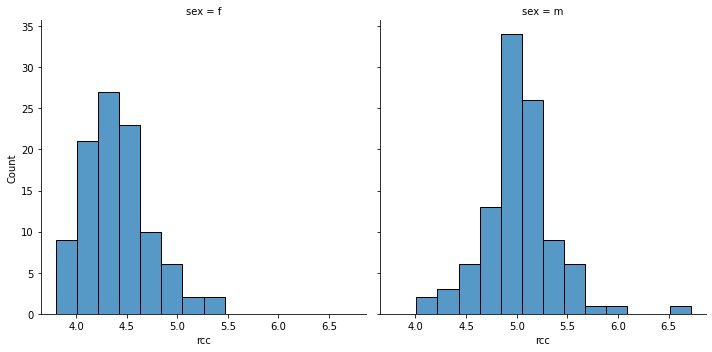

In [3]:
# rcc by male versus female
sns.displot(data=ais, x='rcc', col='sex')

<AxesSubplot:xlabel='sex', ylabel='rcc'>

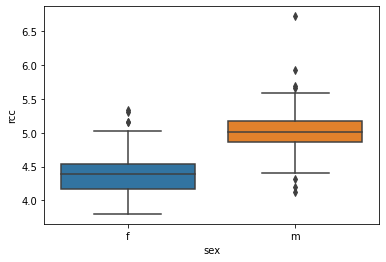

In [4]:
sns.boxplot(x='sex', y='rcc', data=ais)

In [5]:
# Yes there is a significant difference
stats.ttest_ind(ais[ais['sex']=='f']['rcc'], ais[ais['sex']=='m']['rcc'])

Ttest_indResult(statistic=-13.144647003438955, pvalue=7.463492766248318e-29)

In [6]:
# 2. Correlation matrix
ais.corr()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
rcc,1.000000,0.147064,0.924964,0.888800,0.250865,0.299471,-0.403004,-0.493512,0.550975,0.358854,0.403763
wcc,0.147064,1.000000,0.153333,0.134720,0.132073,0.176968,0.136999,0.107960,0.102663,0.076811,0.155662
hc,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,-0.532449,0.583375,0.371192,0.423711
hg,0.888800,0.134720,0.950757,1.000000,0.308391,0.382524,-0.435429,-0.531522,0.610986,0.352322,0.455263
ferr,0.250865,0.132073,0.258240,0.308391,1.000000,0.302556,-0.108243,-0.183386,0.317581,0.123255,0.273702
bmi,0.299471,0.176968,0.320527,0.382524,0.302556,1.000000,0.321116,0.187558,0.713858,0.337097,0.845934
ssf,-0.403004,0.136999,-0.449135,-0.435429,-0.108243,0.321116,1.000000,0.963017,-0.207749,-0.071253,0.154196
pcBfat,-0.493512,0.107960,-0.532449,-0.531522,-0.183386,0.187558,0.963017,1.000000,-0.361850,-0.188022,-0.000193
lbm,0.550975,0.102663,0.583375,0.610986,0.317581,0.713858,-0.207749,-0.361850,1.000000,0.802119,0.930913
ht,0.358854,0.076811,0.371192,0.352322,0.123255,0.337097,-0.071253,-0.188022,0.802119,1.000000,0.780932


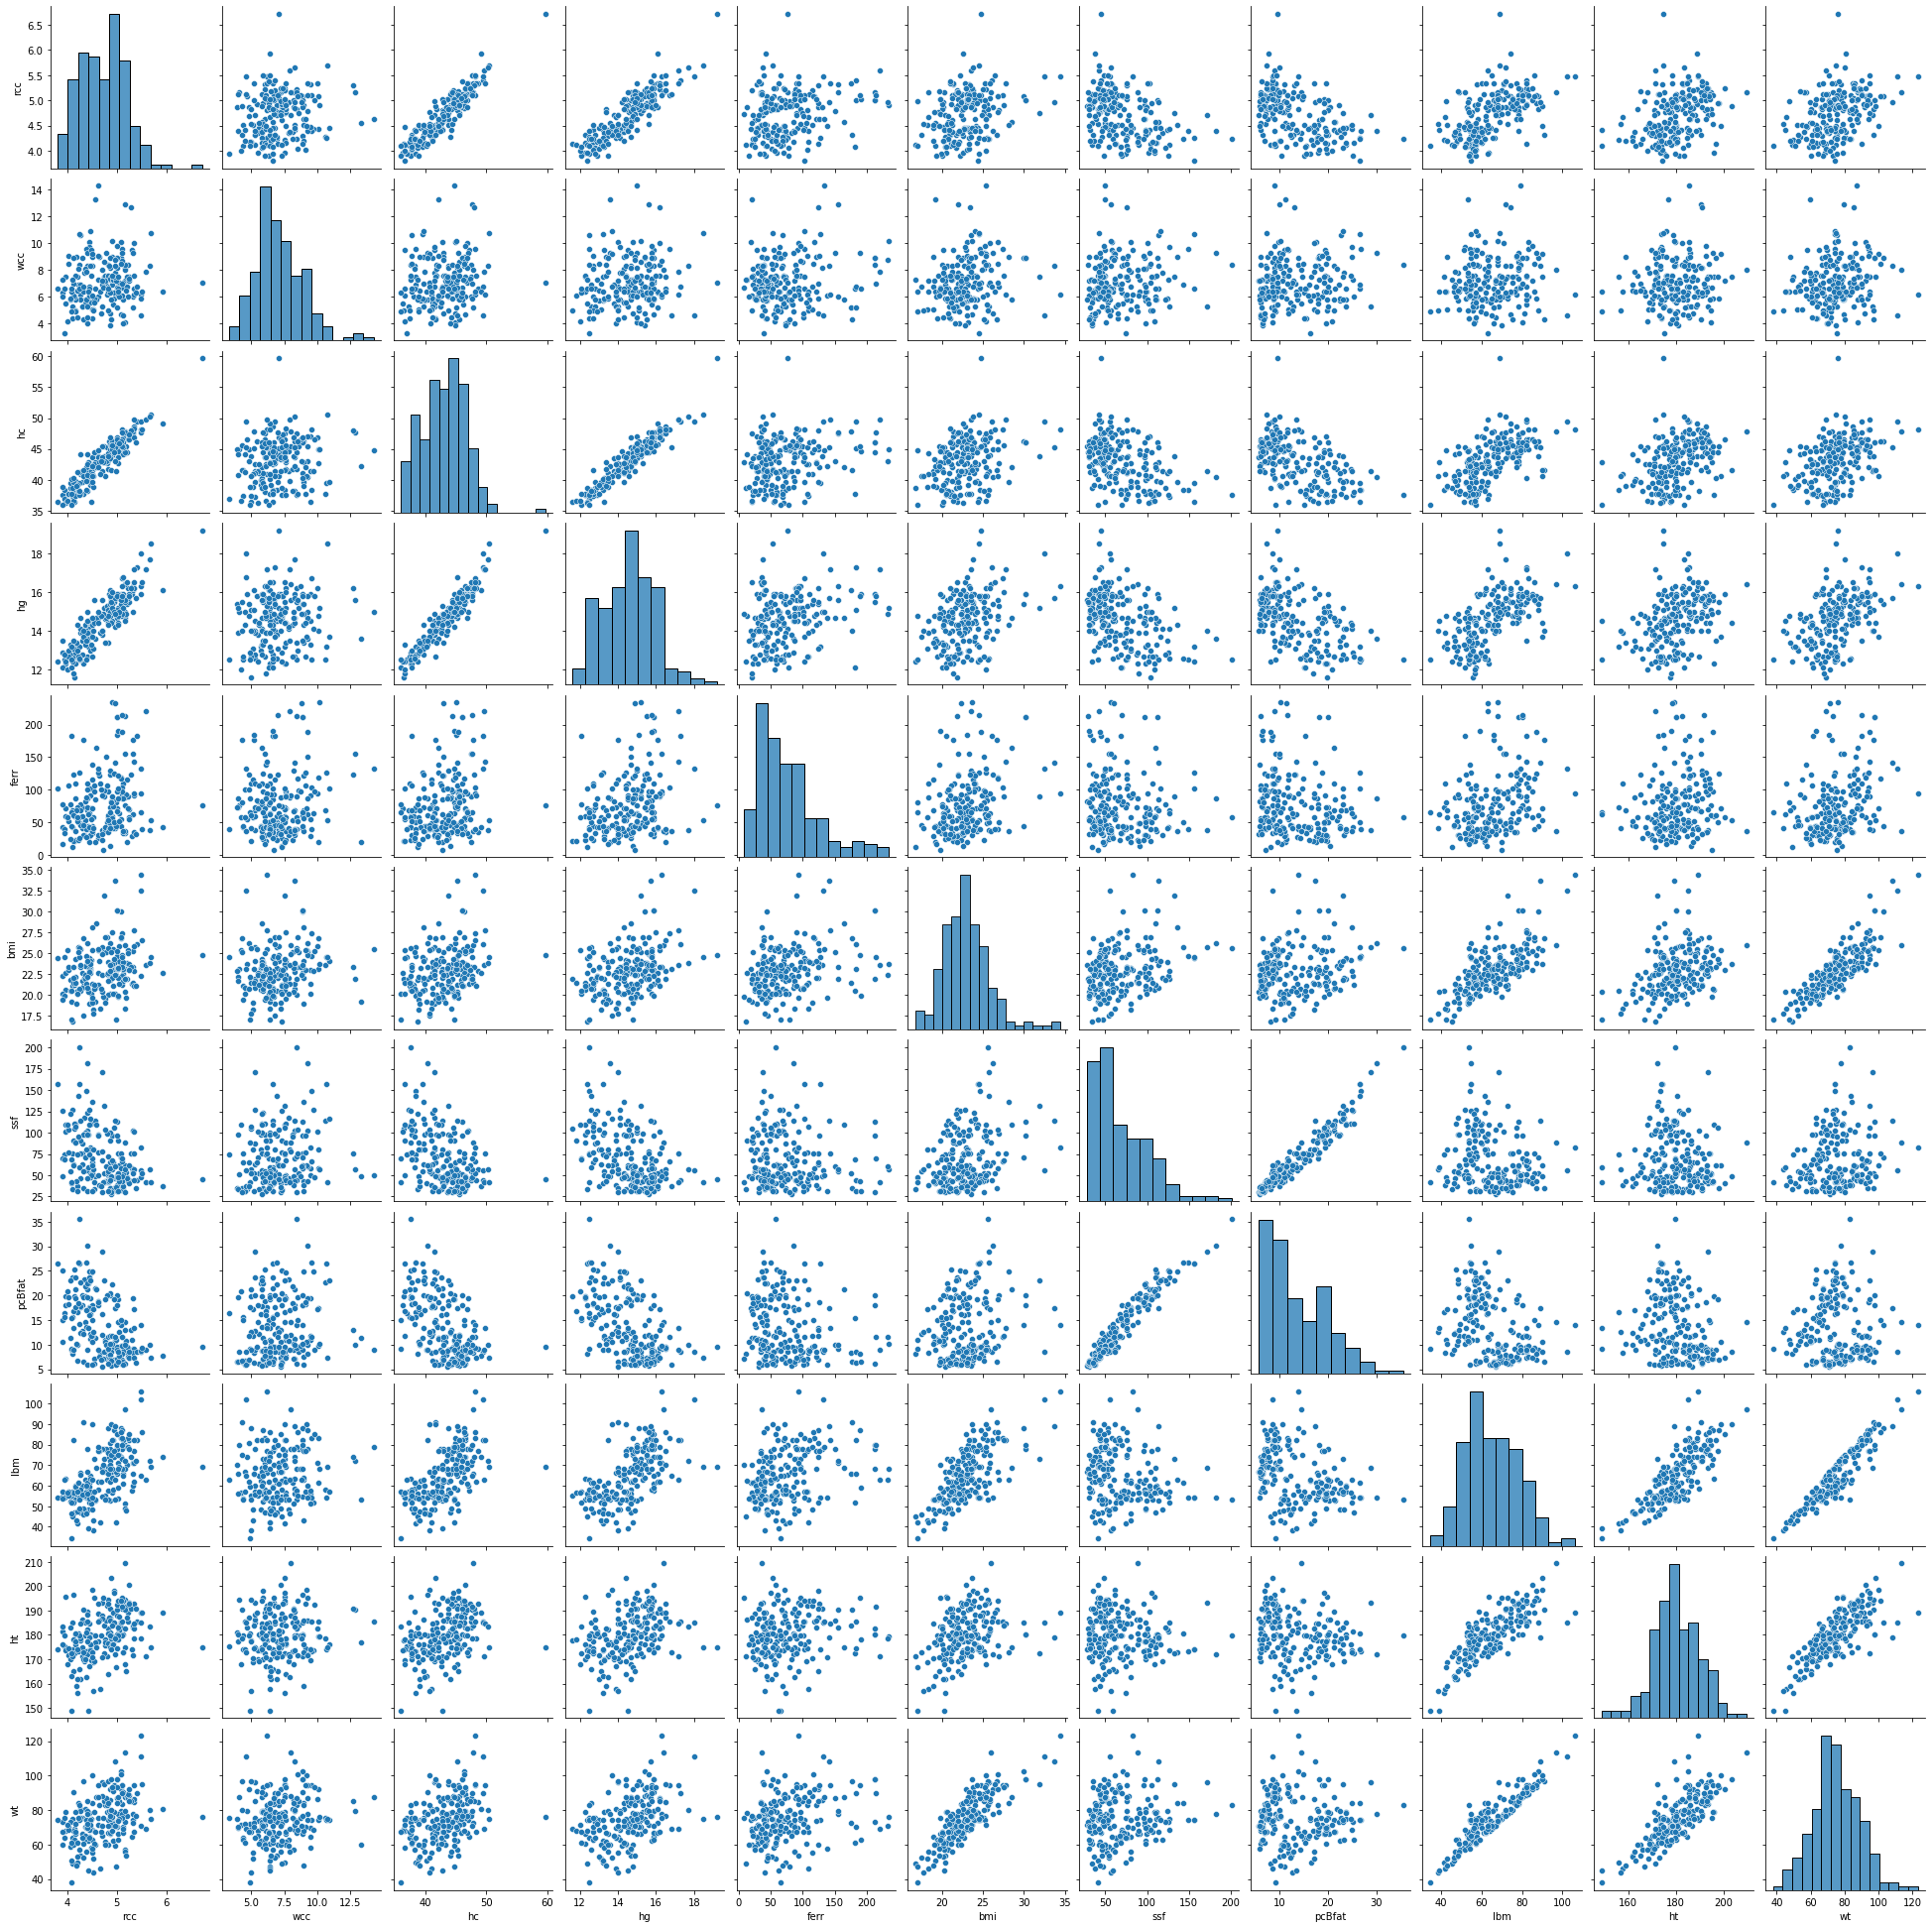

In [7]:
# Perhaps select a few to plot
sns.pairplot(ais)

<AxesSubplot:xlabel='ht', ylabel='wt'>

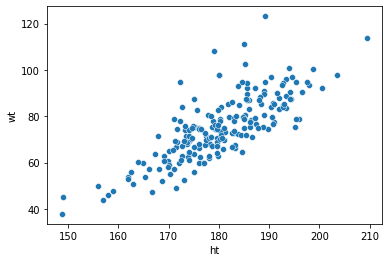

In [8]:
# Visualize relationship between ht and wt
sns.scatterplot(x='ht', y='wt', data=ais)

In [9]:
# Regress ht on wt
stats.linregress(ais['ht'], ais['wt'])

# Equation: weight = -126 + 1.11 * height

LinregressResult(slope=1.1171237435064445, intercept=-126.19048966588099, rvalue=0.7809320717301679, pvalue=9.539370892367334e-43, stderr=0.06318094300091384)

<AxesSubplot:xlabel='ht', ylabel='wt'>

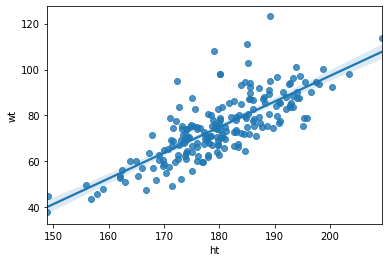

In [10]:
# Bonus: fit the regression line to scatterplot
sns.regplot(x='ht', y='wt', data=ais)

In [11]:
# Split your regression model into training and testing subsets. 
X_train, X_test, y_train, y_test = model_selection.train_test_split(ais[['ht']], ais[['wt']], random_state=1234)

In [12]:
y_train.shape

(151, 1)

In [13]:
y_test.shape

(51, 1)

In [14]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [15]:
# Get the training model coefficients
regr.coef_

array([[1.11892558]])

In [16]:
# What is the R-squared and RMSE on your test model? 
metrics.r2_score(y_test, y_pred)

0.6244602347560315

In [17]:
metrics.mean_squared_error(y_test, y_pred)

71.78454596414129